In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt
import os
os.environ["DJANGO_SETTINGS_MODULE"] = "analyzer.settings"
import sys

In [2]:
import django
django.setup()

In [3]:
from record.models import User, Group, Summary

In [4]:
import datetime
from datetime import timedelta

In [5]:
import pickle

In [6]:
from sklearn.preprocessing import normalize
from sklearn.cluster import MeanShift, estimate_bandwidth

In [8]:
# pickleからデータを開く
with open('kampo_list.pickle', mode='rb') as f:
    keme = pickle.load(f)
# group.name, user_count, start_day, user.username, steps, distance, kampo, step1, step2, ... , step10

# チーム内で、個々の総歩行距離の割合をとって、それをクラスタリングする

In [14]:
i = 0
five_teams = np.array([[]])
three_teams = np.array([[]])
while i < len(keme):
    # 同じチームの人を抜き出す
    hoge = keme[ np.where(keme[:, 0] == keme[i, 0]), : ]
    hoge = hoge[0, ]

    if hoge[0, 6] == None:
        pass
    else:
        # チームの総歩数を算出
        team_total = float(sum( hoge[:, 4] ))

        # 個々の歩き割合を出す->[user1, user2, user3,...., kampo]みたいなarrayをつくる
        if len(hoge) == 5:
            try:
                data = np.array([ hoge[0, 4]/team_total, hoge[1, 4]/team_total, hoge[2, 4]/team_total, hoge[3, 4]/team_total, hoge[4, 4]/team_total, hoge[0, 6] ])
                five_teams = np.vstack((five_teams, data)) if len(five_teams[0]) != 0 else np.array([data])
            except:
                data = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, hoge[0, 6] ])
                five_teams = np.vstack((five_teams, data)) if len(five_teams[0]) != 0 else np.array([data])
        elif len(hoge) == 3:
            try:
                data = np.array([ hoge[0, 4]/team_total, hoge[1, 4]/team_total, hoge[2, 4]/team_total, hoge[0, 6] ])
                three_teams = np.vstack((three_teams, data)) if len(three_teams[0]) != 0 else np.array([data])
            except:
                data = np.array([ 0.0, 0.0, 0.0, hoge[0, 6] ])
                three_teams = np.vstack((three_teams, data)) if len(three_teams[0]) != 0 else np.array([data])
                
    i += len(hoge)

### 3人チームをクラスタリング

number of estimated clusters : 6


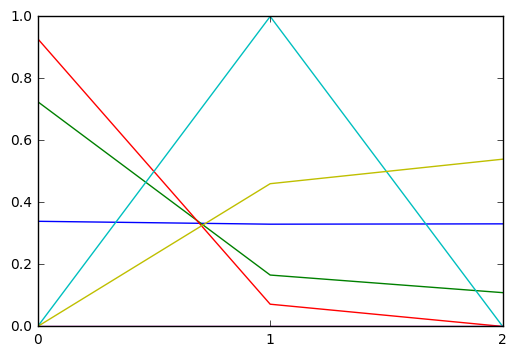

23
4
2
2
1
1
total: 33
[ 0.72515728  0.16580419  0.10903854]


In [16]:
bandwidth = estimate_bandwidth(three_teams[:, 0:3], quantile=0.2)
ms = MeanShift(bandwidth=bandwidth)
ms.fit( three_teams[:, 0:3] )

# 出てきた結果を出力するよ
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
x = np.array( range(3) )
for k in range( len(cluster_centers) ):
    label =  'type' + str( k+1 )
    plt.plot(x, cluster_centers[k], label=label)
plt.xlim(0, 2)
plt.xticks( [0, 1, 2] )
plt.ylim(0.0, 1.0)
# plt.legend()
# plt.xlabel(u'ほげ' , fontproperties=font)
plt.show()

# col = ['blue', 'green', 'red', 'cyan', 'purple', 'magenta']
# for k in range( len(cluster_centers) ):
#     label =  'type' + str( k+1 )
#     #plt.plot(x, cluster_centers[k], label=label)
#     plt.plot(x, cluster_centers[k], label=label, color=col[k])
#     plt.xlim(0, 2)
#     plt.ylim(0.0, 1.0)
#     plt.show()

n_sum = 0
for i in range(n_clusters_):
    print len(np.where( labels == i )[0])
    n_sum += len(np.where( labels == i )[0])
print 'total:', n_sum

print cluster_centers[1]

### 5人チームをクラスタリング

number of estimated clusters : 7


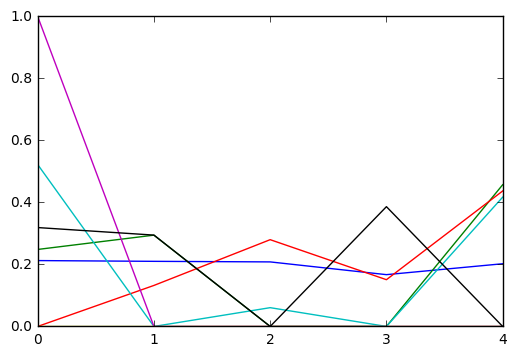

32
1
1
1
1
1
2
total: 39


In [19]:
bandwidth = estimate_bandwidth(five_teams[:, 0:5], quantile=0.23)
ms = MeanShift(bandwidth=bandwidth)
ms.fit( five_teams[:, 0:5] )

# 出てきた結果を出力するよ
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
x = np.array( range(5) )
for k in range( len(cluster_centers) ):
    label =  'type' + str( k+1 )
    plt.plot(x, cluster_centers[k], label=label)
plt.xlim(0, 4)
plt.xticks( [0, 1, 2, 3, 4] )
plt.ylim(0.0, 1.0)
# plt.legend()
# plt.xlabel(u'ほげ' , fontproperties=font)
plt.show()

# col = ['blue', 'green', 'red', 'cyan', 'purple', 'khaki', 'black']
# for k in range( len(cluster_centers) ):
#     label =  'type' + str( k+1 )
#     #plt.plot(x, cluster_centers[k], label=label)
#     plt.plot(x, cluster_centers[k], label=label, color=col[k])
#     plt.xlim(0, 4)
#     plt.ylim(0.0, 1.0)
#     plt.show()

n_sum = 0
for i in range(n_clusters_):
    print len(np.where( labels == i )[0])
    n_sum += len(np.where( labels == i )[0])
print 'total:', n_sum

In [ ]:
# 完歩したかどうかにわけて5人チームをクラスタリング

In [ ]:
# 完歩したかどうかにわけて5人チームをクラスタリング